**Installing Torch:**

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

**Including Required Libraries:**

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

**Download the FashionMNIST dataset:**

In [0]:
train_dataset = dsets.FashionMNIST(root = './data', train = True, transform = transforms.ToTensor(),download = True)
test_dataset = dsets.FashionMNIST(root = './data', train = False, transform = transforms.ToTensor(),download = True)

**Making the dataset iterable:**

In [0]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters/ (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
a = [] #A list to store values of accuracy

In [0]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,shuffle = False)

**Creating model class:**

In [0]:
class CNNFashionMNIST(nn.Module):
    def __init__(self):
        super(CNNFashionMNIST, self).__init__()
        #Layer 1
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
      
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        #Layer 2
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
      
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        #fully connected Layer
        self.fc1 = nn.Linear(32*7*7, 10)
      
    def forward(self, x):
    
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
    
        out = self.maxpool1(out)
    
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
    
        out = self.maxpool2(out)
    
        out = out.view(out.size(0), -1)
    
        out = self.fc1(out)
    
        return out
    

**Instantiating model class:**

In [0]:
model = CNNFashionMNIST()

**Loss Class:**

In [0]:
criterion = nn.CrossEntropyLoss()

**Optimizer Class:**

In [0]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**Training:**

In [0]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = Variable(images)
        
        labels = Variable(labels)
             
        #Making Gradients zero
        optimizer.zero_grad()
        
        
        outputs = model(images)
        
        
        loss = criterion(outputs, labels)
        
        
        loss.backward()
        
        
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
                     
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                images = Variable(images)
                
                
                outputs = model(images)
                
                
                _, predicted = torch.max(outputs.data, 1)
                
                
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            a.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))
            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 0.3808995485305786. Accuracy: 84
Iteration: 1000. Loss: 0.40281185507774353. Accuracy: 85
Iteration: 1500. Loss: 0.3303341269493103. Accuracy: 86
Iteration: 2000. Loss: 0.21109075844287872. Accuracy: 87
Iteration: 2500. Loss: 0.2933875024318695. Accuracy: 87
Iteration: 3000. Loss: 0.25973233580589294. Accuracy: 88
Iteration: 3500. Loss: 0.20535720884799957. Accuracy: 87
Iteration: 4000. Loss: 0.2958343029022217. Accuracy: 89
Iteration: 4500. Loss: 0.3036942481994629. Accuracy: 88
Iteration: 5000. Loss: 0.24423225224018097. Accuracy: 89
Iteration: 5500. Loss: 0.12031407654285431. Accuracy: 89
Iteration: 6000. Loss: 0.19462203979492188. Accuracy: 89


Text(0,0.5,'Accuracy(%)')

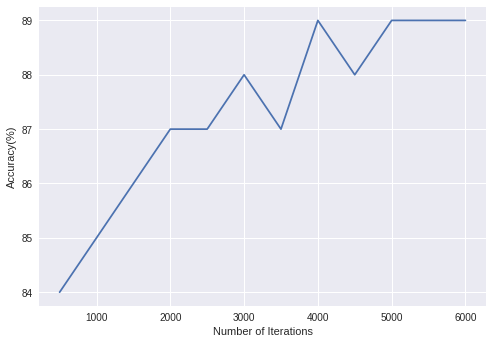

In [0]:
 i =[]
for t in range(1,6001):
    if t % 500 ==0:
        i.append(t)
plt.plot(i,np.array(a))
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy(%)')